# Weight Searching



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from fitpass import fitpass_optimization


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Example

In [2]:
example1 = {
    # user info
    "name": "roman",
    # location
    "location": {
        "longitude": -99.18265186842596,
        "latitude": 19.388900864307445,
    },
    # user loss distance to studios
    "distance_sensitivity": 'medium', # low, medium, high
    # user preferences
    "preferences": {
        "love_activities": ["barre", "yoga", "cycling", "pilates", "gym"],
        "hate_activities": ["crossfit", "functional"],
    },
    # constraints
    "is_pro": 1,
    "max_allowed_classes_per_class": 4,
    "num_classes_per_month": 23,
}

# example weights
WEIGHTS = {
    'distance': 0.6,
    'preference': 0.3,
    'activity': 0.1
}

# solve
df_ex1, fmin = fitpass_optimization(example1, WEIGHTS)

In [3]:
fmin

-0.9498366007433536

## Example 2

In [4]:
# example weights
WEIGHTS = {
    'distance': 0.9,
    'preference': 0.05,
    'activity': 0.05
}

# solve
df_ex1, fmin = fitpass_optimization(example1, WEIGHTS)

In [5]:
fmin

-0.9617320397563542

# Evaluate with dirichletm

In [15]:
# distribute weights using dirichlet
rng = np.random.default_rng(8)
weights = rng.dirichlet(np.ones(3), size=300)

# add wieghts (1,0,0), (0,1,0), (0,0,1)
weights = np.vstack([weights, np.array([1,0,0]), np.array([0,1,0]), np.array([0,0,1])])
weights

array([[0.21507209, 0.57843315, 0.20649476],
       [0.74294523, 0.18704922, 0.07000555],
       [0.9174833 , 0.05965852, 0.02285817],
       [0.48246313, 0.21119888, 0.306338  ],
       [0.0311452 , 0.26027772, 0.70857708],
       [0.63874488, 0.13344499, 0.22781013],
       [0.1697908 , 0.63161541, 0.19859379],
       [0.04130793, 0.49790812, 0.46078394],
       [0.01151693, 0.70792374, 0.28055932],
       [0.05606385, 0.58816829, 0.35576786],
       [0.72545981, 0.11212046, 0.16241974],
       [0.31128745, 0.15695123, 0.53176132],
       [0.17983805, 0.54842942, 0.27173252],
       [0.03526237, 0.76478533, 0.19995231],
       [0.71820748, 0.083103  , 0.19868952],
       [0.48428751, 0.28606401, 0.22964847],
       [0.21377628, 0.0560167 , 0.73020702],
       [0.30855795, 0.31308982, 0.37835222],
       [0.43536774, 0.55137545, 0.01325681],
       [0.27472237, 0.64513278, 0.08014485],
       [0.79337938, 0.1032471 , 0.10337352],
       [0.60804812, 0.23804388, 0.153908  ],
       [0.

In [16]:
# function to map weight to dictionary
def map_weights_to_dict(weights):
    return {
        'distance': weights[0],
        'preference': weights[1],
        'activity': weights[2]
    }

fmins = []
for w in tqdm(weights):
    _, fmin = fitpass_optimization(example1, map_weights_to_dict(w))
    fmins.append(fmin)

100%|██████████| 303/303 [01:15<00:00,  4.01it/s]


In [17]:
fmins

[-0.9820187548020525,
 -0.9419424270798237,
 -0.9606591760337786,
 -0.9596633493336273,
 -0.9973960846895693,
 -0.9522691593322867,
 -0.9858045274619656,
 -0.996546422793376,
 -0.9990371190472248,
 -0.9953127447190695,
 -0.9523314904964394,
 -0.973974605399274,
 -0.9849645198695118,
 -0.9970518663999082,
 -0.9591150837612686,
 -0.959510820195284,
 -0.9832180760191153,
 -0.9742028068589205,
 -0.9639038486289063,
 -0.977031653222161,
 -0.9522480243318585,
 -0.9495289457077626,
 -0.9860250766241683,
 -0.981901995880056,
 -0.9879581245387913,
 -0.9925981874043975,
 -0.9638441164037064,
 -0.9641775256335592,
 -0.9959133831038895,
 -0.9952869348530449,
 -0.973952837535827,
 -0.961912187524386,
 -0.9763151608705427,
 -0.9796908726254168,
 -0.9988551782653263,
 -0.9491576056559343,
 -0.9672495175647908,
 -0.9719757826829233,
 -0.9614589056072489,
 -0.9841346230031718,
 -0.9712877729995879,
 -0.994325142157446,
 -0.9852786795367294,
 -0.9808954852624499,
 -0.9633010624059826,
 -0.98553423108458

In [18]:
df_010, _ = fitpass_optimization(example1, {'distance': 0, 'preference': 1, 'activity': 0})
df_010

,gym_name,gym_times,activity,distance,preference_score,pro_status,geometry
0,Barre Loft,4,[barre],8.037378,1.0,1,POINT (2787045.803 824321.004)
1,Barre MX Condesa,4,[barre],2.950696,1.0,1,POINT (2796623.690 826647.754)
2,Barre Studio | Fer Díez,4,[barre],5.098135,1.0,1,POINT (2794135.268 819122.823)
3,BodyBarre by JbStudio Lomas,4,[barre],4.632854,1.0,1,POINT (2791978.527 827573.143)
4,BodyBarrebyJbStudio Interlomas,3,[barre],9.405212,1.0,1,POINT (2785779.854 825527.914)
5,Bodybarre by JBStudio Polanco,4,[barre],4.961001,1.0,1,POINT (2793060.779 828663.521)


In [19]:
# transformation matrix
A = np.array([
    [0, 0.5, 1],
    [0, np.sqrt(3)/2, 0]
])

In [20]:
# transformed weights
X = weights @ A.T
X

array([[0.49571134, 0.5009378 ],
       [0.16353016, 0.16198937],
       [0.05268744, 0.0516658 ],
       [0.41193744, 0.18290359],
       [0.83871594, 0.22540712],
       [0.29453263, 0.11556675],
       [0.5144015 , 0.54699499],
       [0.70973801, 0.43120108],
       [0.63452119, 0.61307995],
       [0.64985201, 0.50936868],
       [0.21847997, 0.09709916],
       [0.61023693, 0.13592375],
       [0.54594724, 0.47495381],
       [0.58234497, 0.66232352],
       [0.24024102, 0.07196931],
       [0.37268048, 0.2477387 ],
       [0.75821537, 0.04851189],
       [0.53489713, 0.27114374],
       [0.28894453, 0.47750515],
       [0.40271124, 0.55870137],
       [0.15499707, 0.08941461],
       [0.27292994, 0.20615205],
       [0.60376109, 0.39678874],
       [0.57544107, 0.36042297],
       [0.48045153, 0.65041394],
       [0.51804135, 0.68143421],
       [0.23304966, 0.05162289],
       [0.35127944, 0.3814861 ],
       [0.62093117, 0.57190442],
       [0.52373879, 0.72726848],
       [0.

In [21]:
# dataframe of transformed weights and fmin
df = pd.DataFrame(columns=['x', 'y', 'fmin'])
df['x'] = X[:,0]
df['y'] = X[:,1]
df['fmin'] = fmins

df

,x,y,fmin
0,0.495711,0.500938,-0.982019
1,0.163530,0.161989,-0.941942
2,0.052687,0.051666,-0.960659
3,0.411937,0.182904,-0.959663
4,0.838716,0.225407,-0.997396
...,...,...,...
298,0.466057,0.642965,-0.986395
299,0.063506,0.027106,-0.968266
300,0.000000,0.000000,-0.985958
301,0.500000,0.866025,-1.000000


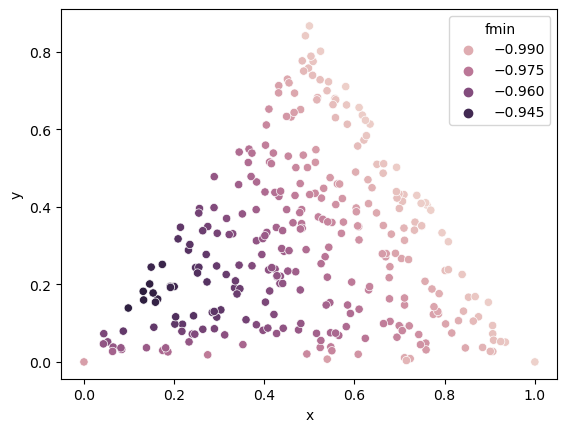

In [22]:
# scatter plot of df x and y colored by fmin
sns.scatterplot(data=df, x='x', y='y', hue='fmin')
plt.show()

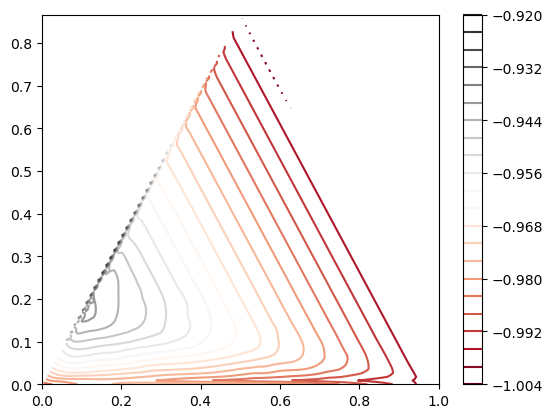

In [23]:
# plot level curves of fmin using df x and y
x = df['x'].values
y = df['y'].values
fmin = df['fmin'].values

# create grid
x_grid = np.linspace(x.min(), x.max(), 100)
y_grid = np.linspace(y.min(), y.max(), 100)

# create meshgrid
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)

# interpolate using griddata
from scipy.interpolate import griddata
Z_grid = griddata((x, y), fmin, (X_grid, Y_grid), method='cubic')

# plot contour
plt.contour(X_grid, Y_grid, Z_grid, 20, cmap='RdGy')
plt.colorbar()
plt.show()